IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

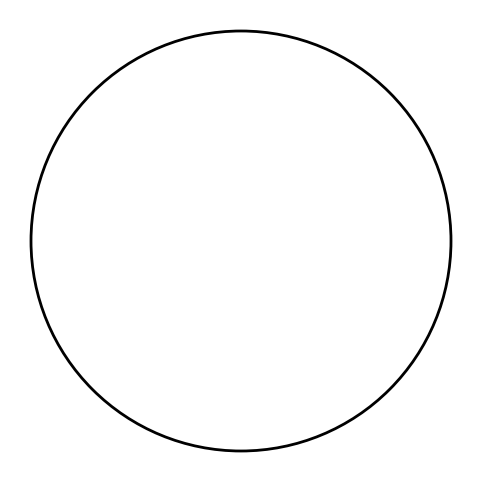

In [6]:
# === visualize_2d.py ===
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

def make_belt_polyline(layout_df):
    # read distances in order from your layout sheet
    segs = [
      ('Infeed→Scanner',       'Distance Infeed-Scanner'),
      ('Scanner→Outfeed1',     'Distance Scanner-Outfeed1'),
      ('Outfeed1→Outfeed2',    'Distance Scanner-Outfeed2'),
      ('Outfeed2→Outfeed3',    'Distance Scanner-Outfeed3'),
      ('Outfeed3→Entrance',    'Distance LastOutfeed-Entrance')
    ]
    lengths = [float(layout_df.loc[layout_df['Layout property']==prop,'Value']) for _,prop in segs]
    # build a simple rectangular / L-shaped path (you can adapt angles to your PDF)
    pts = [(0,0), (lengths[0],0), (lengths[0], lengths[1]),
           (lengths[0]-lengths[2], lengths[1]), (0, lengths[1]+lengths[3]), (0,0)]
    cumdist = np.cumsum([0]+lengths)
    return np.array(pts), cumdist

def dist_to_xy(dist, pts, cumdist):
    # find segment
    idx = np.searchsorted(cumdist, dist, side='right') - 1
    d0, d1 = cumdist[idx], cumdist[idx+1]
    t = (dist - d0)/(d1-d0)
    x0,y0 = pts[idx]
    x1,y1 = pts[idx+1]
    return x0 + t*(x1-x0), y0 + t*(y1-y0)

def main():
    # Load the two files your sim wrote
    layout_df = pd.ExcelFile('PosiSorterData1.xlsx').parse('Layout')
    pos_df    = pd.read_csv('positions.csv')
    pts, cum = make_belt_polyline(layout_df)

    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(pts[:,0], pts[:,1], '-k', lw=3)
    scat = ax.scatter([],[], s=50, edgecolors='k')
    ax.set_aspect('equal'); ax.axis('off')

    times = np.sort(pos_df['time_s'].unique())

    def init():
        scat.set_offsets([])
        return scat,

    def update(frame_idx):
        t = times[frame_idx]
        df = pos_df[pos_df['time_s']==t]
        coords = np.array([dist_to_xy(d, pts, cum) for d in df['dist_m']])
        scat.set_offsets(coords)
        return scat,

    ani = animation.FuncAnimation(fig, update,
                                  frames=len(times),
                                  init_func=init,
                                  interval=100, blit=True)
    plt.show()

if __name__=='__main__':
    main()


In [5]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\20231620\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
